In [ ]:
pip install ktrain

In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [18]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [5]:
categories = [ 'alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med', 'rec.sport.baseball']

In [8]:
train = fetch_20newsgroups(
    subset = 'train',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [9]:
test = fetch_20newsgroups(
    subset = 'test',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [14]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [15]:
test.target

array([0, 4, 2, ..., 2, 3, 0])

In [16]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian']

In [19]:
X_train = train.data
y_train = train.target

X_test = test.data
y_test = test.target

In [21]:
len(X_train), len(X_test)

(2854, 1899)

In [23]:
#X_test

# Build ML with Transformer model

In [24]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen = 512, class_names = categories)

In [26]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 291
	95percentile : 820
	99percentile : 1757


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 323
	95percentile : 894
	99percentile : 2394


In [27]:
model = trans.get_classifier()

In [28]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
178/178 [==============================] - 306s 2s/step - loss: 1.6126 - accuracy: 0.1932
Epoch 2/10
178/178 [==============================] - 293s 2s/step - loss: 1.5643 - accuracy: 0.4037
Epoch 3/10
178/178 [==============================] - 293s 2s/step - loss: 0.6424 - accuracy: 0.9069
Epoch 4/10
178/178 [==============================] - 293s 2s/step - loss: 0.1695 - accuracy: 0.9556
Epoch 5/10
178/178 [==============================] - 274s 2s/step - loss: 0.5792 - accuracy: 0.8092


done.
Visually inspect loss plot and select learning rate associated with falling loss


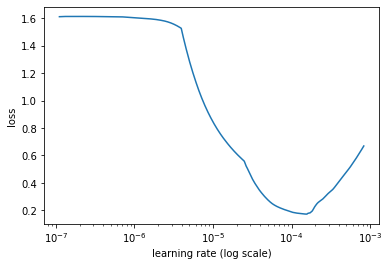

In [29]:
learner.lr_find(show_plot = True, max_epochs = 10)

In [30]:
learner.fit_onecycle(1e-4, 10)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
179/179 [==============================] - 368s 2s/step - loss: 1.1718 - accuracy: 0.6405 - val_loss: 0.2746 - val_accuracy: 0.9142
Epoch 2/10
179/179 [==============================] - 357s 2s/step - loss: 0.1370 - accuracy: 0.9717 - val_loss: 0.2328 - val_accuracy: 0.9279
Epoch 3/10
179/179 [==============================] - 357s 2s/step - loss: 0.0690 - accuracy: 0.9833 - val_loss: 0.2385 - val_accuracy: 0.9379
Epoch 4/10
179/179 [==============================] - 357s 2s/step - loss: 0.0503 - accuracy: 0.9891 - val_loss: 0.2255 - val_accuracy: 0.9484
Epoch 5/10
179/179 [==============================] - 357s 2s/step - loss: 0.0780 - accuracy: 0.9823 - val_loss: 0.3874 - val_accuracy: 0.9205
Epoch 6/10
179/179 [==============================] - 357s 2s/step - loss: 0.0810 - accuracy: 0.9819 - val_loss: 0.2887 - val_accuracy: 0.9368
Epoch 7/10
179/179 [==============================] - 357s 2s/step - loss: 0.0

In [33]:
learner.validate(class_names = categories)

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.92      0.92       319
soc.religion.christian       0.96      0.96      0.96       389
         comp.graphics       1.00      0.97      0.98       397
               sci.med       0.95      0.96      0.95       396
    rec.sport.baseball       0.95      0.97      0.96       398

              accuracy                           0.96      1899
             macro avg       0.96      0.96      0.96      1899
          weighted avg       0.96      0.96      0.96      1899



array([[295,   2,   0,   6,  16],
       [  8, 373,   0,   8,   0],
       [  1,   4, 385,   4,   3],
       [  8,   5,   1, 380,   2],
       [  8,   3,   0,   2, 385]])

In [34]:
learner.view_top_losses(n = 5, preproc = trans)

----------
id:562 | loss:9.83 | true:rec.sport.baseball | pred:soc.religion.christian)

----------
id:389 | loss:9.34 | true:comp.graphics | pred:sci.med)

----------
id:1425 | loss:9.14 | true:rec.sport.baseball | pred:sci.med)

----------
id:171 | loss:8.79 | true:soc.religion.christian | pred:sci.med)

----------
id:431 | loss:8.64 | true:alt.atheism | pred:soc.religion.christian)



In [36]:
X_test[562]

'From: fortmann@superbowl.und.ac.za (Paul Fortmann - PG)\nSubject: "The Word Perfect" EXE file needed\nOrganization: University Of Natal (Durban)\nLines: 14\n\nA friend of mine managed to get a copy of a computerised Greek and Hebrew \nLexicon called "The Word Perfect" (That is not the word processing \npackage WordPerfect). However, some one wiped out the EXE file, and she \nhas not been able to restore it. There are no distributors of the package in \nSouth Africa. I would appreciate it, if some one could email me the file, or \nat least tell me where I could get it from. \n\nMy email address is\n\tfortmann@superbowl.und.ac.za     or\n\tfortmann@shrike.und.ac.za\n \nMany thanks.\n\nIn Him, Paul Fortmann\n'

# Predict

In [37]:
predictor = ktrain.get_predictor(learner.model, preproc = trans)

In [72]:
x = "The genetics of human eye colour is much more complex than previously thought, according to a new study published today."

In [73]:
predictor.predict(x)

'sci.med'

In [45]:
predictor.save("distilBERT_model")